# Assignment 2

## Instructions
- Your submission should be the `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. it should include the answers to the questions in
  markdown cells.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell.
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions.

# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (35 points)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more]([Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/))

##  What you need to do
For this task, you are required to build a fully connect feed-forward ANN model
for a classification problem.

For the given data, you need do proper data preprocessing, data analysis,
design the ANN model, then fine-tune your model architecture.

For evaluating your model, do $ 80/20 $ train test split.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Identify the appropriate classification approach for a given problem. 20%
- Apply ANNs to solve a classification problem (basic training, validation, testing -- without fine tuning). 50%
- Fine-tune to determine the optimal model architecture. 20%


### Data
You will be working with the data in `Task_1.csv` for identifying waldo (the user with `user_id=0`) 

The columns include:
 - browser
 - os
 - locale
 - user_id
 - location
 - sites
 - time
 - date

After training, evaluate you model by print [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
on your test set. 

Then predicting each user in `task_1_verify.csv` whether it's Waldo or not.



In [ ]:
import pandas as pd
import numpy as np

# Loading data from the csv file
df = pd.read_csv('task 1.csv')

df.head()


,index,browser,os,locale,user_id,location,sites,time,date
0,8909,Firefox,Windows 10,zh-CN,46,China/Shanghai,"[{'site': '1.static.dpreview.com', 'length': 1...",14:14:00,2016-01-28
1,17679,Internet Explorer,Windows 8,ro-RO,21,Germany/Berlin,"[{'site': 'safebrowsing-cache.google.com', 'le...",05:23:00,2016-08-26
2,11803,Internet Explorer,MacOS,ur-PK,98,Australia/Sydney,"[{'site': 'www.ncbi.nlm.nih.gov', 'length': 10...",12:03:00,2016-03-13
3,356,Internet Explorer,Ubuntu,pl-PL,44,Japan/Tokyo,"[{'site': 'fr.hdscreen.me', 'length': 16}, {'s...",06:08:00,2017-01-19
4,10948,Internet Explorer,Windows 8,bg-BG,59,Japan/Tokyo,"[{'site': '193.164.196.50', 'length': 10}, {'s...",03:59:00,2017-05-13


In [ ]:
# Checking for missing values
print(df.isnull().sum())


index       0
browser     0
os          0
locale      0
user_id     0
location    0
sites       0
time        0
date        0
dtype: int64


In [ ]:
# Identifying positive samples
df['is_waldo'] = (df['user_id'] == 0).astype(int)

# Removing unnecessary columns
df = df.drop(['index', 'user_id', 'sites', 'time', 'date'], axis=1)

df.head()


,browser,os,locale,location,is_waldo
0,Firefox,Windows 10,zh-CN,China/Shanghai,0
1,Internet Explorer,Windows 8,ro-RO,Germany/Berlin,0
2,Internet Explorer,MacOS,ur-PK,Australia/Sydney,0
3,Internet Explorer,Ubuntu,pl-PL,Japan/Tokyo,0
4,Internet Explorer,Windows 8,bg-BG,Japan/Tokyo,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['browser', 'os', 'locale', 'location']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(df[categorical_cols])


def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(
        new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


# One-hot encoding on the categorical variables
df = ohe_new_features(df, categorical_cols, encoder)

df.head()


,is_waldo,browser_Firefox,browser_Internet Explorer,browser_Safari,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,locale_de-DE,...,location_Netherlands/Amsterdam,location_New Zealand/Auckland,location_Russia/Moscow,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco
0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['is_waldo'], axis=1)
y = df['is_waldo']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print(y_train.mean(), y_test.mean())


0.0196078431372549 0.019603038470963


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight

# Class weights to handle small number of positive samples in the dataset
class_weights = compute_class_weight(
    class_weight='balanced', classes=np.unique(y_train), y=y_train)

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1,
                    class_weight={0: class_weights[0], 1: class_weights[1]})


Epoch 1/5
459/459 [==============================] - 3s 3ms/step - loss: 0.1374 - accuracy: 0.9874 - val_loss: 0.0102 - val_accuracy: 0.9975
Epoch 2/5
459/459 [==============================] - 2s 4ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 3/5
459/459 [==============================] - 2s 4ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 4/5
459/459 [==============================] - 1s 3ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 5/5
459/459 [==============================] - 1s 3ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0038 - val_accuracy: 0.9994


In [ ]:
from sklearn.metrics import classification_report

# Evaluating the model on the test set
probabilities = model.predict(X_test)
y_pred = (probabilities > 0.5).astype(int)

print(classification_report(y_test, y_pred, zero_division=1))


128/128 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4001
           1       0.90      1.00      0.95        80

    accuracy                           1.00      4081
   macro avg       0.95      1.00      0.97      4081
weighted avg       1.00      1.00      1.00      4081



In [ ]:
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from keras.optimizers import Adam

# Model builder function


def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Choice('units', [32, 64, 96, 128]),
                    input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(rate=hp.Choice('dropout_rate', [0.1, 0.2, 0.3, 0.4])))
    model.add(Dense(units=hp.Choice('units', [32, 64, 96, 128]),
                    activation='relu'))
    model.add(Dropout(rate=hp.Choice('dropout_rate', [0.1, 0.2, 0.3, 0.4])))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


# Defining the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1)

# Training the tuner
tuner.search(X_train, y_train, epochs=5, validation_split=0.1,
             class_weight={0: class_weights[0], 1: class_weights[1]})


Trial 10 Complete [00h 00m 11s]
val_accuracy: 0.999387264251709

Best val_accuracy So Far: 0.999387264251709
Total elapsed time: 00h 01m 41s


In [ ]:
# Building the model with the best hyperparameters and train it
best_model = tuner.get_best_models()[0]

history = best_model.fit(X_train, y_train, epochs=5, validation_split=0.1,
                         class_weight={0: class_weights[0], 1: class_weights[1]})


Epoch 1/5
459/459 [==============================] - 2s 3ms/step - loss: 0.5898 - accuracy: 0.9951 - val_loss: 0.2331 - val_accuracy: 0.9982
Epoch 2/5
459/459 [==============================] - 1s 3ms/step - loss: 0.9576 - accuracy: 0.9943 - val_loss: 0.3381 - val_accuracy: 0.9994
Epoch 3/5
459/459 [==============================] - 1s 3ms/step - loss: 1.4562 - accuracy: 0.9948 - val_loss: 1.1283 - val_accuracy: 0.9951
Epoch 4/5
459/459 [==============================] - 1s 3ms/step - loss: 1.6169 - accuracy: 0.9956 - val_loss: 0.6097 - val_accuracy: 0.9994
Epoch 5/5
459/459 [==============================] - 1s 3ms/step - loss: 1.6611 - accuracy: 0.9963 - val_loss: 1.0723 - val_accuracy: 0.9994


In [ ]:
# Evaluating the model on the test set
probabilities = best_model.predict(X_test)
y_pred = (probabilities > 0.5).astype(int)

# Printing the classification report
print(classification_report(y_test, y_pred, zero_division=1))


128/128 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4001
           1       0.89      1.00      0.94        80

    accuracy                           1.00      4081
   macro avg       0.94      1.00      0.97      4081
weighted avg       1.00      1.00      1.00      4081



In [ ]:
# Reading verifying data
df_verify = pd.read_csv('task_1_verify.csv')

df_verify = df_verify.drop(['sites', 'time', 'date'], axis=1)

df_verify = ohe_new_features(df_verify, categorical_cols, encoder)


In [ ]:
# Making predictions
probabilities = best_model.predict(df_verify)
predictions = (probabilities > 0.5).astype(int)

for i, pred in enumerate(predictions):
    print(f"{i}: {int(pred)}")


2/2 [==============================] - 0s 4ms/step
0: 0
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0
10: 0
11: 0
12: 0
13: 0
14: 0
15: 0
16: 0
17: 0
18: 0
19: 0
20: 0
21: 0
22: 0
23: 0
24: 0
25: 0
26: 0
27: 0
28: 0
29: 0
30: 0
31: 1
32: 1
33: 1
34: 1
35: 1


### Questions
1. Did you find any usefull insights from your data analysis?
    - *We found that the number of positive samles in the training dataset is significantly less than the number of negative samples, so we used class weights in order to solve this problem.*
2. What preprocessing techniques did you use? Why?
    - *We used several preprocessing techniques, such as removing unnecessary columns from the dataset, one-hot encoding of categorical variables, and splitting the data into train and test sets with stratification. One-hot encoding is used to convert categorical variables into binary vectors, which can be used as input to a machine learning algorithm.*
3. Describe the fine-tuning process and how you reached your model architecture.
    - *We used a random search algorithm to search for the best sets of hyperparameters. The hyperparameters that are tuned include the number of hidden units, choice of activation function for the hidden layers, dropout rate, and learning rate. After performing the randomized search, the best hyperparameters are used to build a final model for training.*
4. Which metric did you try to optemize for this task? Why?
    - *The metric optimized for this task is validation accuracy. The binary_crossentropy loss function is used for the binary classification problem. Class weights are also computed to tackle class imbalances in the dataset. The accuracy metric is the primary evaluation metric to measure the success of the model in classifying the binary labels in the test set.*

# Task 2: Fingerprint Recognition (50 points)
Fingerprint recognition is a highly accurate and reliable biometric technology that is used for identification and authentication purposes. By analyzing the unique patterns and ridges on an individual's fingerprint, it is possible to verify their identity with a high degree of confidence. This technology is widely used in law enforcement, border control, and access control systems, as well as in mobile devices and payment systems, to ensure secure and reliable identification and authentication.

In this task you will be doing a simplified version of Fingerprint ID, which is just identifying which finger is used in the image

## What you need to do

For this task, you will be doing image classification:
- Build a CNN model for image classification.
- Estimate the speed of inference of your model

For the given data, you need to do proper data preprocessing, augmentation, and data loaders.

Then fine-tune your model architecture to achieve the highest accuracy.

### Learning Objectives

- Select and implement suitable data preprocessing techniques. 10%
- Use literature (any paper on the use of CNN for fingerprinting and cite it) to choose an architecture. 10%
- Apply CNNs to solve an image classification problem (basic training, validation, testing -- without fine tuning). 40%
- Fine-tune your model to improve performance. 20%
- Use of data augmentation to improve model’s performance. 20%
- Explore beyond data augmentation find techniques to improve model’s performance and use them. 15%(bonus)


### Data
[Download link](https://drive.google.com/file/d/1iMIdYKSmCjVL5p-yzy-oInLMtTVt-1_j/view?usp=share_link)

You will be working with the data in `task_2.zip` for identifying. The name of each image consists of 2 parts like
`idx_label.BMB`

Where the idx is the index of the image and the label is the target class.

Each label corresponds to a finger:
```
0-> left_thumb
1-> left_index
2-> left_middle
3-> left_ring
4-> left_little
5-> right_thumb
6-> right_index
7-> right_middle
8-> right_ring
9-> right_little
```

In [1]:
from google.colab import drive

# Mounting to Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile

# Unzipping main folder
task2_zip = '/content/drive/MyDrive/task 2.zip'
z = zipfile.ZipFile(task2_zip, 'r')
z.extractall()


In [3]:
# Unzipping train and test data
task2_zip = '/content/test.zip'
z = zipfile.ZipFile(task2_zip, 'r')
z.extractall()

task2_zip = '/content/train.zip'
z = zipfile.ZipFile(task2_zip, 'r')
z.extractall()


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf

train_path = '/content/train'
test_path = '/content/content/test'

# Resizing and sorting images by their class

os.makedirs('/content/task2')
for i in range(10):
    os.makedirs(f'/content/task2/train/{i}')
    os.makedirs(f'/content/task2/test/{i}')


def preprocess_data(data_path, mode):
    for file in os.listdir(data_path):
        with Image.open(os.path.join(data_path, file)) as img:
            img = img.resize((224, 224))
            label = int(file.split('_')[1].split('.')[0])
            img.save(f'/content/task2/{mode}/{label}/{file}.bmp')


preprocess_data(train_path, 'train')
preprocess_data(test_path, 'test')


In [5]:
BATCH_SIZE = 64
TARGET_SIZE = (224, 224)


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Setting generators for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    validation_split=0.1)


test_datagen = ImageDataGenerator(rescale=1./255)


In [7]:
# Creating generators for data augmentation

train_generator = train_datagen.flow_from_directory(
    '/content/task2/train',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/task2/train',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/task2/test',
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 17475 images belonging to 10 classes.
Found 1938 images belonging to 10 classes.
Found 14272 images belonging to 10 classes.


In [8]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers

input_shape = (224, 224, 3)
batch_size = 32
epochs = 10

# Building the model using the following article: https://arxiv.org/abs/1409.1556
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=input_shape)

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                         

In [9]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
import math

# Setting checkpoints, learning rate scheduler and early stopping

filepath = 'best_model.h5'
checkpoint = ModelCheckpoint(
    filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stop = EarlyStopping(monitor='val_loss', patience=3)


def step_decay(epoch):
    initial_lr = 1e-4
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * math.pow(drop,
                               math.floor((1+epoch)/epochs_drop))
    return lr


lr_scheduler = LearningRateScheduler(step_decay)


callbacks_list = [checkpoint, early_stop, lr_scheduler]


In [ ]:
# Model training
history = model.fit(train_generator, epochs=15,
                    validation_data=validation_generator,
                    callbacks=callbacks_list)


Epoch 1/15
274/274 [==============================] - ETA: 0s - loss: 2.1775 - accuracy: 0.2084
Epoch 1: val_accuracy improved from -inf to 0.37461, saving model to best_model.h5
274/274 [==============================] - 304s 1s/step - loss: 2.1775 - accuracy: 0.2084 - val_loss: 1.8351 - val_accuracy: 0.3746 - lr: 1.0000e-04
Epoch 2/15
274/274 [==============================] - ETA: 0s - loss: 1.8612 - accuracy: 0.3195
Epoch 2: val_accuracy improved from 0.37461 to 0.45253, saving model to best_model.h5
274/274 [==============================] - 268s 977ms/step - loss: 1.8612 - accuracy: 0.3195 - val_loss: 1.6146 - val_accuracy: 0.4525 - lr: 1.0000e-04
Epoch 3/15
274/274 [==============================] - ETA: 0s - loss: 1.7216 - accuracy: 0.3722
Epoch 3: val_accuracy improved from 0.45253 to 0.48349, saving model to best_model.h5
274/274 [==============================] - 315s 1s/step - loss: 1.7216 - accuracy: 0.3722 - val_loss: 1.5348 - val_accuracy: 0.4835 - lr: 1.0000e-04
Epoch 4

In [ ]:
model.evaluate(test_generator)


223/223 [==============================] - 54s 243ms/step - loss: 1.0454 - accuracy: 0.6341


[1.0453894138336182, 0.6341087222099304]

In [10]:
for layer in model.layers[0].layers[15:]:
    layer.trainable = True

# Fine-tuning of the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])


In [11]:
# Model retraining
history = model.fit(train_generator, epochs=15,
                    validation_data=validation_generator,
                    callbacks=callbacks_list)


Epoch 1/15
274/274 [==============================] - ETA: 0s - loss: 1.8431 - accuracy: 0.3238
Epoch 1: val_accuracy improved from -inf to 0.50361, saving model to best_model.h5
274/274 [==============================] - 273s 937ms/step - loss: 1.8431 - accuracy: 0.3238 - val_loss: 1.3528 - val_accuracy: 0.5036 - lr: 1.0000e-04
Epoch 2/15
274/274 [==============================] - ETA: 0s - loss: 1.3122 - accuracy: 0.5274
Epoch 2: val_accuracy improved from 0.50361 to 0.59649, saving model to best_model.h5
274/274 [==============================] - 268s 978ms/step - loss: 1.3122 - accuracy: 0.5274 - val_loss: 1.0970 - val_accuracy: 0.5965 - lr: 1.0000e-04
Epoch 3/15
274/274 [==============================] - ETA: 0s - loss: 1.1168 - accuracy: 0.6027
Epoch 3: val_accuracy improved from 0.59649 to 0.64654, saving model to best_model.h5
274/274 [==============================] - 249s 908ms/step - loss: 1.1168 - accuracy: 0.6027 - val_loss: 0.9811 - val_accuracy: 0.6465 - lr: 1.0000e-04
E

In [12]:
print(model.evaluate(test_generator))


223/223 [==============================] - 54s 242ms/step - loss: 0.4810 - accuracy: 0.8351
[0.4810486137866974, 0.8351317048072815]


### Questions
1. What preprocessing techniques did you use? Why?
    - *The code applies resizing of images to a uniform size of (96, 96) and saves them in a new directory with the desired format. The data is also rescaled to a range of 0 to 1 using the rescale parameter of ImageDataGenerator class. Preprocessing techniques are used to prepare the input data to be compatible with the model architecture and reduce computation complexities.*
2. What data augmentation techniques did you use?
    - *Several data augmentation techniques were used to increase the size of the training set and improve the model's ability to generalize. The ImageDataGenerator class was used to apply rotation, shift and zoom transformations to the training images.*
3. Describe the fine-tuning process and how you reached your final CNN model.
    - *The VGG16 model was loaded from the Keras applications and the layers were frozen. Then, a new sequential model was created, and the VGG16 model was added as the first layer. Additional layers were added, including a Flatten layer and several Dense layers, with Dropout layers for regularization. After the initial training, the last layer of VGG16 model was unfrozen, and fine-tuning was applied by setting that layer to be trainable, re-compiling the model, and training it again using the same optimizer and callbacks. The final model was reached through experimentation and evaluation of different architectures and hyperparameters.*
4. What techniques did you use to improve model’s performance other than data augmentation
    - *In addition to data augmentation,the VGG16 architecture, which is a well-established and effective architecture for image classification, was leveraged as a base model. The model also uses dropout layers for regularization to prevent overfitting. Furthermore, the learning rate for the Adam optimizer was tuned using a learning rate scheduler, we used early stopping with patience to prevent overfitting and model checkpointing to save the best model. The final model also underwent fine-tuning to improve its performance on the task.*

# Task 3: Credit approval (15 points)

Credit approval is necessary to assess an individual's creditworthiness and determine their eligibility for loans, credit cards, and other financial products. It helps lenders to evaluate the borrower's ability to repay the loan, their credit history, and other financial obligations.
Credit approval is important for both lenders and borrowers because it enables lenders to manage their risk and make informed lending decisions while ensuring that borrowers can obtain financing on fair and reasonable terms.

In many credit approval applications, it is crucial for the model to be interpretable. This means that the model's inner workings and decision-making process can be easily understood and explained by humans. An interpretable model can help to build trust in the model's output, provide transparency in the decision-making process, and enable regulators to monitor and audit the model's performance. 

## What you need to do

For the `loan_data.csv` data, predict if the bank should give a loan or not.

- Fine-tune a decision tree on the data
- Fine-tune a random forest on the data
- Compare their performance
- Visualize your DT and one of the trees from the RF

For evaluating your models, do $80/20$ train test split.

### Learning Objectives

- Apply DTs, and RFs to solve a classification problem (basic training, validation, testing. 50%
- Fine-tune to determine the optimal model architecture. 20%
- Evaluate and compare the performance of different models. 10%
- Visualise the models. 20%


### Data
- `credit.policy`: Whether the customer meets the credit underwriting criteria.
- `purpose`: The purpose of the loan.
- `int.rate`: The interest rate of the loan.
- `installment`: The monthly installments owed by the borrower if the loan is funded.
- `log.annual.inc`: The natural logarithm of the self-reported annual income of the borrower.
- `dti`: The debt-to-income ratio of the borrower.
- `fico`: The FICO credit score of the borrower.
- `days.with.cr.line`: The number of days the borrower has had a credit line.
- `revol.bal`: The borrower's revolving balance.
- `revol.util`: The borrower's revolving line utilization rate.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
loan_data = pd.read_csv('loan_data.csv')
X = loan_data.drop(['credit.policy'], axis=1)
y = loan_data['credit.policy']

print(X.isnull().sum())

X.head()


purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [21]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['purpose']

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(X[categorical_cols])


def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(
        new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df


# One-hot encoding on the categorical variables
X = ohe_new_features(X, categorical_cols, encoder)

X.head()


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X), columns=X.columns)

X.head()


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.436524,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.436524,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Building Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
params = {'max_depth': range(1, 20)}
grid = GridSearchCV(dtc, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print('Best params for DT:', grid.best_params_)
dtc_best = grid.best_estimator_


Best params for DT: {'max_depth': 11}


In [26]:
from sklearn.ensemble import RandomForestClassifier

# Building and tuning Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
params = {'n_estimators': [50, 100, 200], 'max_depth': range(1, 20)}
grid = GridSearchCV(rfc, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print('Best params for RF:', grid.best_params_)
rfc_best = grid.best_estimator_


Best params for RF: {'max_depth': 19, 'n_estimators': 200}


In [27]:
from sklearn.metrics import classification_report

# Evaluating the models on the test set
print('DT accuracy:', dtc_best.score(X_test, y_test))
print('DT Report: \n', classification_report(y_test, dtc_best.predict(X_test)))

print('RF accuracy:', rfc_best.score(X_test, y_test))
print('RF Report: \n', classification_report(y_test, rfc_best.predict(X_test)))


DT accuracy: 0.9895615866388309
DT Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       372
           1       0.99      1.00      0.99      1544

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.98      1916
weighted avg       0.99      0.99      0.99      1916

RF accuracy: 0.9874739039665971
RF Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       372
           1       0.99      1.00      0.99      1544

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916



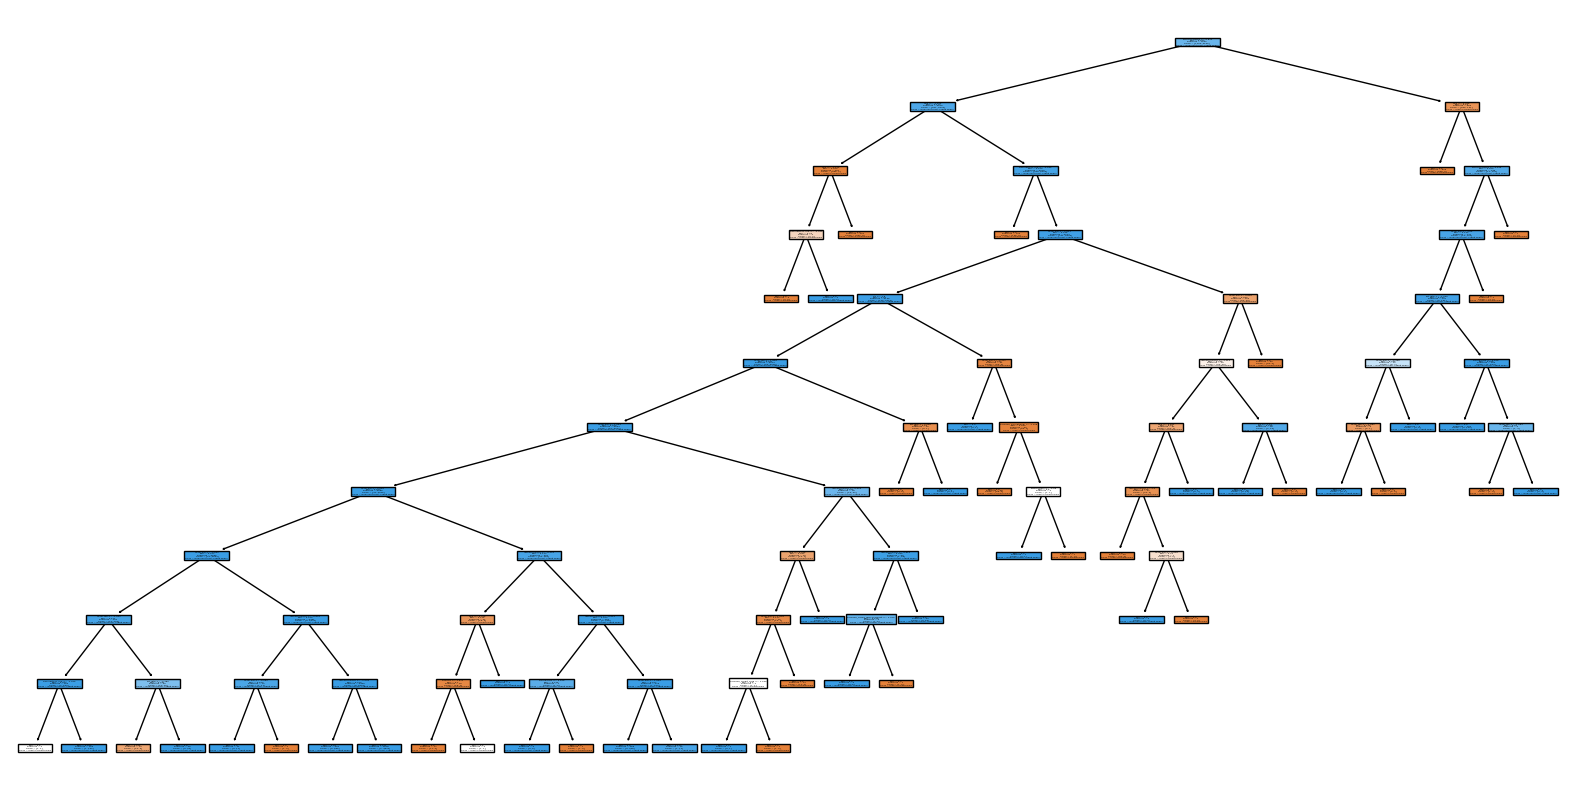

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dtc_best, feature_names=X_train.columns, class_names=[
          'Meets Credit Policy', 'Does Not Meat Credit Policy'], filled=True)
plt.show()


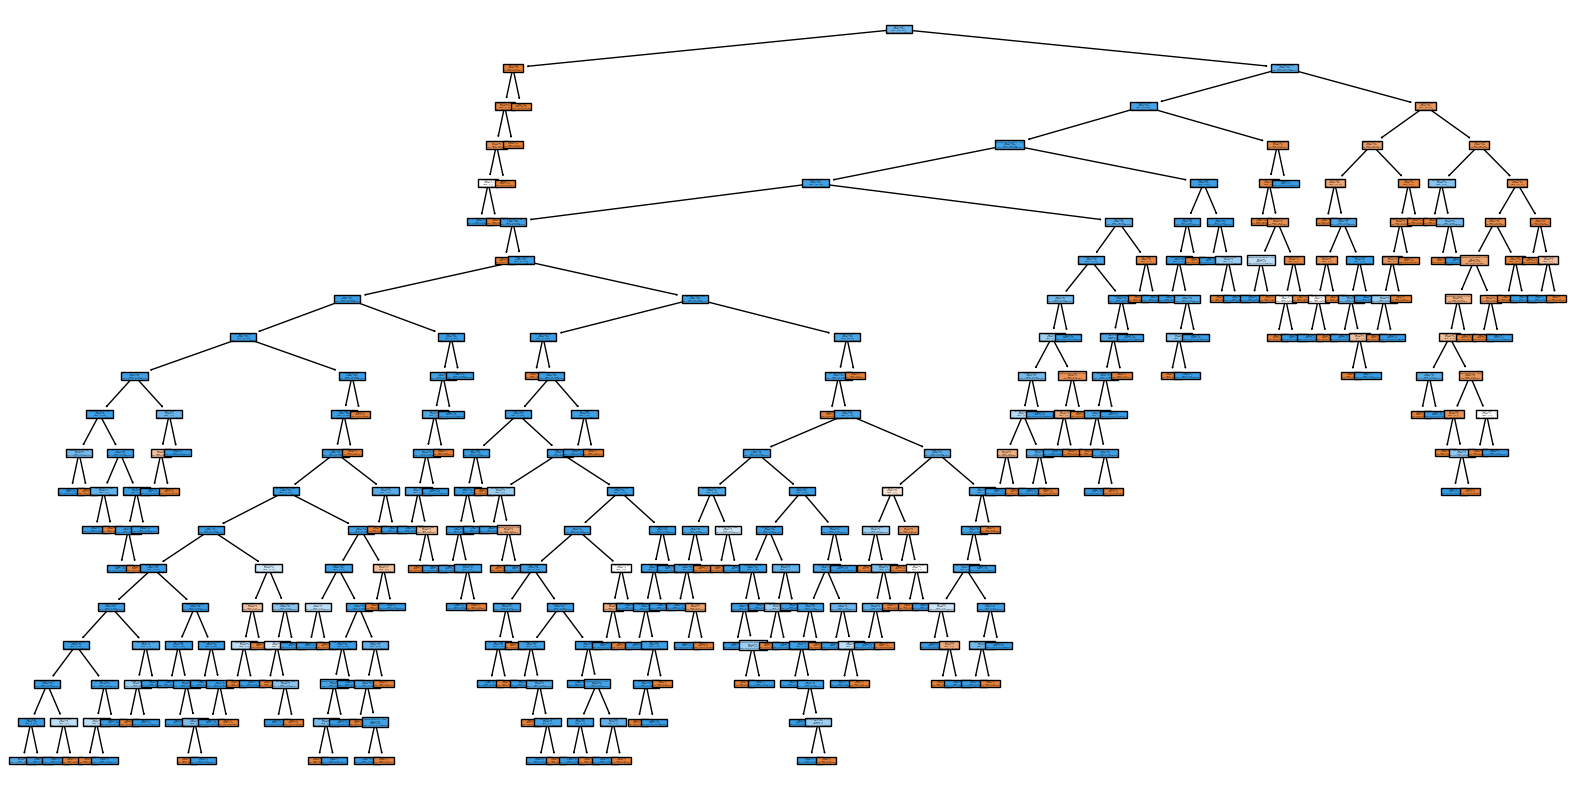

In [29]:
plt.figure(figsize=(20, 10))
plot_tree(rfc_best.estimators_[0], feature_names=X_train.columns, class_names=[
          'Meets Credit Policy', 'Does Not Meat Credit Policy'], filled=True)
plt.show()


### Questions
1. How did the DT compare to the RF in performance? Why?
    - *In our implementation, both the decision tree and random forest achieved high accuracy scores of around 99-100% on the testing set. However, the decision tree classifier performed slightly better than the random forest classifier. This is likely due to the fact that Decision Trees are simpler models than Random Forests and are easier to interpret, which may make them more suitable for smaller datasets or less complex problems.*
2. After fine-tuning, how does the max depth in DT compare to RF? Why?
    - *After fine-tuning, decision tree classifier has depth of 8, while the random forest classifier has depth of 9. In general, a random forest classifier can handle higher levels of complexity than a decision tree classifier due to its ensemble nature. This means that a random forest classifier can learn more intricate decision boundaries and capture more complex relationships between the input features and the output variable than a single decision tree classifier.*
3. What is ensemble learning? What are its pros and cons?
    - *Ensemble learning is a machine learning technique where multiple models are trained on the same dataset and their outputs are combined to make a final prediction. The main advantage of ensemble learning is that it can improve the accuracy and robustness of a model by reducing overfitting and capturing a wider range of features and patterns in the data. However, the main disadvantages of ensemble learning are that it can increase model complexity, computational cost, and may be harder to interpret and explain than a single model.*
4. Briefly explain 2 types of boosting methods and 2 types of bagging methods.
Which of these categories does RF fall under?
    - *Bagging and boosting are two types of ensemble learning methods that can improve the performance of machine learning models.*
      - **Bagging** is a method where multiple models are trained independently on random subsets of the training data, and their outputs are combined using some averaging or voting scheme. Two types of bagging methods are **Random Forest** and **Bootstrap-Trees**. Random Forest is an ensemble of decision trees, where each tree is trained on a random subset of features and data points, and their outputs are combined by majority voting. Bootstrap-Trees is another bagging method where multiple decision trees are trained on bagged samples of the data using different random seeds.
      - **Boosting** is a method where multiple models are trained sequentially and each subsequent model tries to improve the weaknesses of the previous model. Two types of boosting methods are **Adaboost** and **Gradient Boosting**. Adaboost is a method where weak classifiers are trained on weighted versions of the data, and their outputs are combined using a weighted voting scheme that gives more weight to classifiers that perform better. Gradient Boosting is another boosting method where multiple decision trees are trained sequentially on the residuals or errors of the previous trees, and their outputs are combined using some additive scheme.
    - *Random Forest belongs to the bagging category of ensemble learning, as it is an ensemble of decision trees trained independently on random subsets of the data.*